<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/Project_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Background 
- Research questions:


1/ what is the likelihood that people like the Alexa products in general?

2/ Among the various Amazon Alexa products, which ones the customers like the most?

3/ what is the lowest rated product?




### Data Acquisition

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
amz_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t')

In [135]:
amz_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


#### Insight in customers reviews

### Data Wrangling

In [136]:
amz_df.shape

(3150, 5)

In [137]:
#show the missing data number
amz_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [138]:
amz_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [139]:
amz_df.nunique()

rating                 5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64

In [140]:
amz_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [141]:
amz_df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [142]:
amz_df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [143]:
amz_df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [144]:
(amz_df['feedback'].value_counts()/len(amz_df)*100)

1    91.84127
0     8.15873
Name: feedback, dtype: float64

In [145]:
low_rate=amz_df[amz_df.rating==1]
low_rate.variation.value_counts()

Black                           30
Black  Dot                      22
Black  Spot                     18
Black  Plus                     17
White                           13
Configuration: Fire TV Stick    13
Black  Show                     10
White  Dot                      10
White  Spot                      9
White  Show                      8
White  Plus                      5
Charcoal Fabric                  4
Sandstone Fabric                 2
Name: variation, dtype: int64

In [146]:
percent_low_rate=(low_rate.variation.value_counts()/amz_df['variation'].value_counts()*100)
percent_low_rate

Black                           11.494253
Black  Dot                       4.263566
Black  Plus                      6.296296
Black  Show                      3.773585
Black  Spot                      7.468880
Charcoal Fabric                  0.930233
Configuration: Fire TV Stick     3.714286
Heather Gray Fabric                   NaN
Oak Finish                            NaN
Sandstone Fabric                 2.222222
Walnut Finish                         NaN
White                           14.285714
White  Dot                       5.434783
White  Plus                      6.410256
White  Show                      9.411765
White  Spot                      8.256881
Name: variation, dtype: float64

### EDA (Exploratory Data Analysis)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


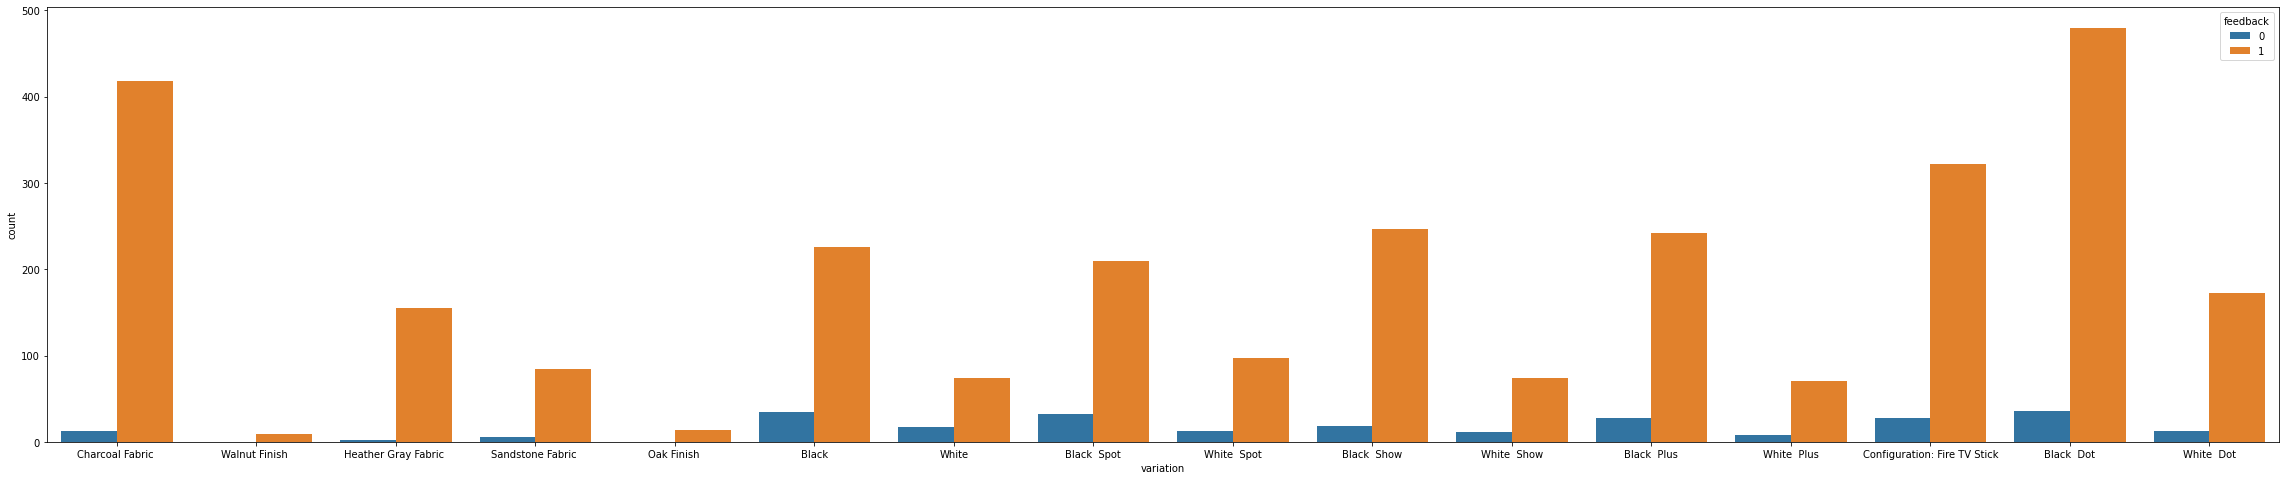

In [147]:
plt.figure(figsize=(40,8))
sns.countplot("variation", hue="feedback", data=amz_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


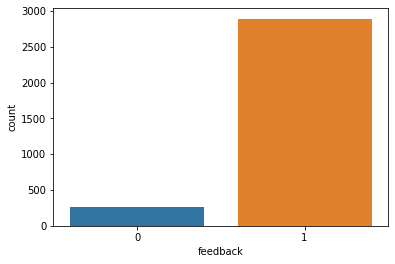

In [148]:
sns.countplot(amz_df['feedback'], label ='Count')

Text(0, 0.5, 'Values')

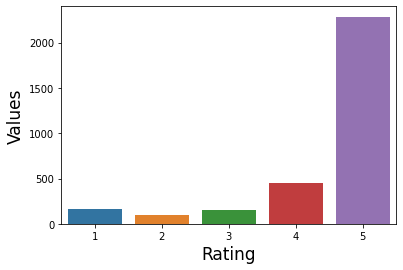

In [149]:
g = sns.countplot(x='rating', data=amz_df)
g.set_xlabel("Rating", fontsize=17)
g.set_ylabel("Values", fontsize=17)

In [150]:
cm=amz_df.drop(['verified_reviews'], axis=1)
cm.head()

,rating,date,variation,feedback
0,5,31-Jul-18,Charcoal Fabric,1
1,5,31-Jul-18,Charcoal Fabric,1
2,4,31-Jul-18,Walnut Finish,1
3,5,31-Jul-18,Charcoal Fabric,1
4,5,31-Jul-18,Charcoal Fabric,1


In [151]:
!pip install category_encoders

In [152]:
import category_encoders as cten

In [153]:
cm_feature_names = ['rating', 'date', 'variation', 'feedback']
encoded_data = cten.OrdinalEncoder(cols=cm_feature_names)

In [154]:
enc_data_df = encoded_data.fit_transform(cm)

In [155]:
enc_data_df.head()

,rating,date,variation,feedback
0,1,1,1,1
1,1,1,1,1
2,2,1,2,1
3,1,1,1,1
4,1,1,1,1


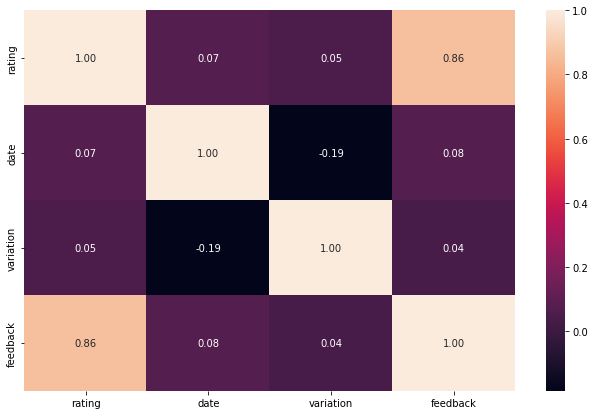

In [156]:
#relationships analysis
fig, axe = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(enc_data_df.corr(),ax=axe,fmt='.2f', annot=True )

### Observation:

- Out of 3150, 2893 feedbacks were positives which implies that 92% of reviewers like the Alexa products in general.

- Out of 91 rated white variation of the Alexa products, 13 have received the lowest rating, or 14% of the bad rating. The White Alexa Products is the lowest rated by the reviewers.

- there is a positive linear correlation between rating and feedback, meaning that good rating implies positive feedback. 

#### Sentiment Analysis 

In [157]:
amz_df['verified_reviews'][0]

'Love my Echo!'

In [158]:
max(amz_df['verified_reviews'].apply(len))

2851

In [159]:
long_msg= amz_df[amz_df['verified_reviews'].apply(len)==2851]
long_msg.verified_reviews

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [160]:
long_msg.verified_reviews.iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [161]:
import string

In [162]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
from nltk.corpus import stopwords

In [164]:
stopwords.words('english')[0:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

# Function 
### To Automate the text data pre processing part

In [165]:

def review_text_pre_process(text_review):
  remove_punct = [char for char in text_review if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [166]:
amz_df['verified_reviews'].head(10).apply(review_text_pre_process)

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
5    [received, echo, gift, needed, another, Blueto...
6    [Without, cellphone, cannot, use, many, featur...
7    [think, 5th, one, Ive, purchased, Im, working,...
8                                       [looks, great]
9    [Love, I’ve, listened, songs, haven’t, heard, ...
Name: verified_reviews, dtype: object

### Vectorization

In [167]:
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
bag_of_words = CountVectorizer(analyzer=review_text_pre_process).fit(amz_df['verified_reviews'])

In [169]:
bag_of_words_trf = bag_of_words.transform(amz_df['verified_reviews'])

### TF-IDF (Transformer)

In [170]:
from sklearn.feature_extraction.text import TfidfTransformer

In [171]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [172]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

### Model Building




In [173]:
from sklearn.naive_bayes import MultinomialNB

In [174]:
custFeelng_detector_model = MultinomialNB().fit(tfidf_trf,amz_df['feedback'])

In [175]:
test_message = amz_df['verified_reviews'][10]

In [176]:
bag_of_words_test_message = bag_of_words.transform([test_message])

In [177]:
tfidf_test_messsge = tfidf_fit.transform(bag_of_words_test_message)

In [178]:
custFeelng_detector_model.predict(tfidf_test_messsge)[0]

1

In [179]:
amz_df['feedback'][0]

1

In [180]:
prediction_for_all_messages = custFeelng_detector_model.predict(tfidf_trf)

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(amz_df['feedback'],prediction_for_all_messages)

0.920952380952381

In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(amz_df['feedback'],prediction_for_all_messages)

array([[   8,  249],
       [   0, 2893]])

Text(0.5, 1.0, 'MB-Confusion Matrix')

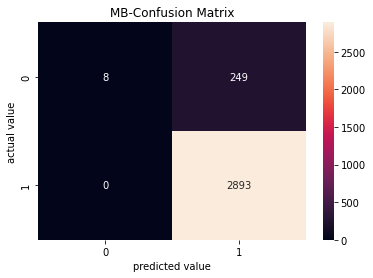

In [183]:
cm1 = confusion_matrix(amz_df['feedback'],prediction_for_all_messages)
sns.heatmap(cm1,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')
plt.title(f'MB-Confusion Matrix')

In [184]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(amz_df['feedback'],prediction_for_all_messages))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       257
           1       0.92      1.00      0.96      2893

    accuracy                           0.92      3150
   macro avg       0.96      0.52      0.51      3150
weighted avg       0.93      0.92      0.89      3150



### Conclusion

The model has a precision and an accuracy score of .96. it means that the model is making good predictions at 96% which is close to the likelihood that people love the products we observed above. So, the model is suitable for making good prediction on the sentiment of the reviewers.